<h1 style="text-align:center"> Drexel University </h1>
<h2 style = "text-align:center"> College of Computing and Informatics</h2>
<h2 style = "text-align:center">INFO 213: Data Science Programming II</h2>
<h3 style = "text-align:center">Assignment 2</h3>
<div style="text-align:center; border-style:solid; padding: 10px">
<div style="font-weight:bold">Due Date: Sunday, July 19, 2020</div>
This assignment counts for 15% of the final grade
</div>

<h3 style="color:red; font-weight:bold; text-decoration: underline">DON'T FORGET TO PUT YOUR NAME BELOW</h3>

### NAME:
Khanh Tran

### A. Assignment Overview
This assignment provides the opportunity for you to practice with the data science in Python. 

### B. What to Hand In
	
Sumbit a completed this Jupyter notebook. 

### C. How to Hand In

Submit your Jupyter notebook file through the course website in the Blackboard Learn system.

### D. When to Hand In

1. Submit your assignment no later than 11:59pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### E. Written Presentation Requirements (if applicable)
Images must be clear and legible. Assignments will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as their contents. Please make sure that the text of your assignments is well-structured, using paragraphs, full sentences, and other features of well-written presentation.

### F. Marking Schemes:

Marking assignments will be based on several aspects: presentation, correctness and coding styles. 

1. Write a good comment for each variable, each method, each control branch, and each loop. 
2. Your method comments must mention the purpose of each parameter, and must be grammatically correct.  

### G. Data Sets

This assignment needs the data sets specified in the questions.

### H. Answer the following questions

## Question 1:

Implement the core function `knn_classify(k, labeled_points, new_point)` for KNN classification algorithm. Your implementation may use the `distance(v, w)` and `majority_vote_weighted(labels, distances)` functions you implemented in Assignment 1. Copy or import from Assignment 1 all the functions that are required here. Test the algorithm using the Iris Flower data set. I have extracted the training data and test set as `labeled_points` and `new_points`. The `labeled_points` set contains 120 instances. The `new_points` set contains 30 instances for testing. Evaluate the implemented algorithm using the set of `new_points` in terms of accuracy, recall, precision, and F1-score. Use different k values to evaluate the algorithm.

In [3]:
# Import modules
import numpy as np
import math
import random
from collections import defaultdict, Counter

In [118]:
# import or copy from Assignment 1 all the methods needed here.
def distance(v, w):
    """
    computes the Euclidean distance between two vectors
    INPUT: v and w are two vectors of numbers in the same length
    OUTPUT: the Euclidean distance between v and w
    """
    sum_squared = []
    
    for i, j in enumerate(v):
        component = (j-w[i])**2
        sum_squared.append(component)
    

    result = math.sqrt(sum(sum_squared))
    
    return result

# This is my version of majority_vote_weighted(). But the function in your solution also turns in the same result.
def majority_vote_weighted(labels, distances):
    """
    Selects the label with largest average weight in terms of the inverse of distances
    INPUT:
        labels: a list of labels
        distances: a list of distances corresponding to the labels
    OUTPUT:
        the label with highest average weight
    """
    # There are points in the labeled_points 
    for i, distance in enumerate(distances):
        if distance == 0:
            result = labels[i]
            return result

    weights = [1/x for x in distances]

    average_weights = []

    labels_unique = list(set(labels))

    for label in labels_unique:
        label_sum_weight = []
        count = 0

        for i, j in enumerate(labels):
            if j == label:
                label_sum_weight.append(weights[i])
                count += 1

        average_weights.append(sum(label_sum_weight)/count)

    label_weight = dict(zip(labels_unique,average_weights))

    label_weight = sorted(label_weight.items(), key=lambda item: item[1], reverse=True)

    highest_labels = [label_weight[i][0] for i in range(len(label_weight)) if label_weight[i][1] == label_weight[0][1]]

    result = random.choice(highest_labels)        
    
    return result

In [119]:
def knn_classify(k, labeled_points, new_point):
    """
    classifies the new_point by a KNN algorithm using majority_vote_weighted()
    INPUT:
        k: number of neighbors used for classification
        labeled_points: a set of training instances each of which should be a pair (point, label)
        new_point: a new instance under clasification; a point is simply a list of numbers
    OUTPUT:
        label: the classified lable for the new_point
    """

    # compute the distances from the new point to each labeled_point
    labels = []
    distances = []
    
    # order the labeled points from nearest to farthest
    by_distance = sorted(labeled_points,
                         key=lambda point_label: distance(point_label[0], new_point))
    
    for (point, label) in by_distance[:k]:
        distances.append(distance(point, new_point))
        labels.append(label)
    
    # and let them vote
    return majority_vote_weighted(labels[:k], distances[:k])

### Test
The following tests the function `knn_classify(k, labeled_points, new_point)`

In [120]:
import pandas as pd
iris_df = pd.read_csv("Iris.csv")
X = iris_df.iloc[:, 1:-1]
y = iris_df.Species

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

labeled_points = []
for i in range(X_train.shape[0]):
    point = X_train.iloc[i]
    label = y_train.iloc[i]
    labeled_points.append((list(point), label))

new_points = []
for i in range(X_test.shape[0]):
    new_points.append(list(X_test.iloc[i]))

In [125]:
y_pred = []
for new_point in new_points:
#     lab = 'test' # comment out this when test; use the following statement
    lab = knn_classify(1, labeled_points, new_point)
    y_pred.append(lab)

### Evaluation

In [122]:
y_pred_series = pd.Series(y_pred)

In [123]:
y_test.index = range(y_test.shape[0])

In [126]:
print("The classification accuracy: ", sum(y_test == y_pred_series)/len(y_test))

The classification accuracy:  1.0


In [105]:
tp = sum((y_test == 'Iris-versicolor') & (y_pred_series == 'Iris-versicolor'))

fn = sum((y_test == 'Iris-versicolor') & (y_pred_series != 'Iris-versicolor'))

fp = sum((y_test  != 'Iris-versicolor') & (y_pred_series == 'Iris-versicolor'))

tn = sum((y_test != 'Iris-versicolor') & (y_pred_series != 'Iris-versicolor'))

print("recall for class 'Iris-versicolor' = " + str(tp / (tp + fn)))
print("precision for class 'Iris-versicolor' = " + str(tp / (tp + fp)))
print("F1 Score for class 'Iris-versicolor' = " + str(2 * tp /(2 * tp + fp + fn))) 

recall for class 'Iris-versicolor' = 1.0
precision for class 'Iris-versicolor' = 1.0
F1 Score for class 'Iris-versicolor' = 1.0


In [71]:
tp = sum((y_test == 'Iris-setosa') & (y_pred_series == 'Iris-setosa'))

fn = sum((y_test == 'Iris-setosa') & (y_pred_series != 'Iris-setosa'))

fp = sum((y_test  != 'Iris-setosa') & (y_pred_series == 'Iris-setosa'))

tn = sum((y_test != 'Iris-setosa') & (y_pred_series != 'Iris-setosa'))

print("recall for class 'Iris-setosa' = " + str(tp / (tp + fn)))
print("precision for class 'Iris-setosa' = " + str(tp / (tp + fp)))
print("F1 Score for class 'Iris-setosa' = " + str(2 * tp /(2 * tp + fp + fn))) 

recall for class 'Iris-setosa' = 1.0
precision for class 'Iris-setosa' = 1.0
F1 Score for class 'Iris-setosa' = 1.0


In [74]:
tp = sum((y_test == 'Iris-virginica') & (y_pred_series == 'Iris-virginica'))

fn = sum((y_test == 'Iris-virginica') & (y_pred_series != 'Iris-virginica'))

fp = sum((y_test  != 'Iris-virginica') & (y_pred_series == 'Iris-virginica'))

tn = sum((y_test != 'Iris-virginica') & (y_pred_series != 'Iris-virginica'))
    
print("recall for class 'Iris-virginica' = " + str(tp / (tp + fn)))
print("precision for class 'Iris-virginica' = " + str(tp / (tp + fp)))
print("F1 Score for class 'Iris-virginica' = " + str(2 * tp /(2 * tp + fp + fn))) 

recall for class 'Iris-virginica' = 1.0
precision for class 'Iris-virginica' = 1.0
F1 Score for class 'Iris-virginica' = 1.0


### Your Evaluation
You are encouraged to use different k values to evaluate the performance.

In [129]:
y_pred = []
for new_point in new_points:
#     lab = 'test' # comment out this when test; use the following statement
    lab = knn_classify(10, labeled_points, new_point)
    y_pred.append(lab)

In [130]:
y_pred_series = pd.Series(y_pred)
y_test.index = range(y_test.shape[0])
print("The classification accuracy: ", sum(y_test == y_pred_series)/len(y_test))

The classification accuracy:  0.9666666666666667


In [131]:
tp = sum((y_test == 'Iris-versicolor') & (y_pred_series == 'Iris-versicolor'))

fn = sum((y_test == 'Iris-versicolor') & (y_pred_series != 'Iris-versicolor'))

fp= sum((y_test  != 'Iris-versicolor') & (y_pred_series == 'Iris-versicolor'))

tn = sum((y_test != 'Iris-versicolor') & (y_pred_series != 'Iris-versicolor'))

print("recall for class 'Iris-versicolor' = " + str(tp / (tp + fn)))
print("precision for class 'Iris-versicolor' = " + str(tp / (tp + fp)))
print("F1 Score for class 'Iris-versicolor' = " + str(2 * tp /(2 * tp + fp + fn))) 

recall for class 'Iris-versicolor' = 1.0
precision for class 'Iris-versicolor' = 0.9
F1 Score for class 'Iris-versicolor' = 0.9473684210526315


In [132]:
tp = sum((y_test == 'Iris-setosa') & (y_pred_series == 'Iris-setosa'))

fn = sum((y_test == 'Iris-setosa') & (y_pred_series != 'Iris-setosa'))

fp= sum((y_test  != 'Iris-setosa') & (y_pred_series == 'Iris-setosa'))

tn = sum((y_test != 'Iris-setosa') & (y_pred_series != 'Iris-setosa'))

print("recall for class 'Iris-setosa' = " + str(tp / (tp + fn)))
print("precision for class 'Iris-setosa' = " + str(tp / (tp + fp)))
print("F1 Score for class 'Iris-setosa' = " + str(2 * tp /(2 * tp + fp + fn))) 

recall for class 'Iris-setosa' = 1.0
precision for class 'Iris-setosa' = 1.0
F1 Score for class 'Iris-setosa' = 1.0


In [133]:
tp = sum((y_test == 'Iris-virginica') & (y_pred_series == 'Iris-virginica'))

fn = sum((y_test == 'Iris-virginica') & (y_pred_series != 'Iris-virginica'))

fp= sum((y_test  != 'Iris-virginica') & (y_pred_series == 'Iris-virginica'))

tn = sum((y_test != 'Iris-virginica') & (y_pred_series != 'Iris-virginica'))

print("recall for class 'Iris-virginica' = " + str(tp / (tp + fn)))
print("precision for class 'Iris-virginica' = " + str(tp / (tp + fp)))
print("F1 Score for class 'Iris-virginica' = " + str(2 * tp /(2 * tp + fp + fn))) 

recall for class 'Iris-virginica' = 0.9090909090909091
precision for class 'Iris-virginica' = 1.0
F1 Score for class 'Iris-virginica' = 0.9523809523809523


## Question 2
MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. 

The goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We've curated small sets of data for training and testing. The file digits-4k.csv contains 4000 hand-written digit images for training, while digits-2h.csv contains 200 digit images for testing. 

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

Each data set has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Use the KNN classifier in the Sciket Learn package to classify the 200 images in the test set (using the 4000 instances in digits-4k.csv as the training data). The KNN classifier can be imported as sklearn.neighbors.KNeighborsClassifier. 

Write a program to evaluate the KNN classifier with k ranging from 1 to 15. Plot the scores of the classifier against the range of k values.

Discuss the results, for example, any thoughts on improving the accuracy?

In [134]:
train_4k = pd.read_csv("digits-4k.csv")

In [135]:
test_2h = pd.read_csv("digits-2h.csv")

In [136]:
from sklearn.neighbors import KNeighborsClassifier

#### Build, test, plot the results below

In [137]:
# Function that calculates the scores
def knn_mnist(k, train, test, mnist_class=None):
    model = KNeighborsClassifier(n_neighbors=k)
    
    # Split x and y
    train_x = train.iloc[:,1:] # Get the images
    train_y = train.iloc[:,0] # Get the label

    test_x = test.iloc[:,1:]
    test_y = test.iloc[:,0]
    
    # Fit the model
    model.fit(train_x, train_y)
    
    # Predict
    y_pred = model.predict(test_x)
    
    tp = sum((test_y == mnist_class) & (y_pred == mnist_class))
    fn = sum((test_y == mnist_class) & (y_pred != mnist_class))
    fp= sum((test_y != mnist_class) & (y_pred == mnist_class))
    tn = sum((test_y != mnist_class) & (y_pred != mnist_class))
    
    # Metrics
    acc = sum(test_y == y_pred)/len(test_y)
    
    # Avoid zero by zero division error
    if tp == 0 & fp == 0:
        prec = 'undefined'
    else:
        prec = tp / (tp + fp)

    if tp == 0 & fn == 0:
        rec = 'undefined'
    else:
        rec = tp / (tp + fn)
        
    if (tp == 0) & (fp == 0) & (fn == 0):
        f1 = 'undefined'
    else:
        f1 = 2 * tp /(2 * tp + fp + fn)
    
    metrics = [acc, prec, rec, f1]
    
    return metrics

In [160]:
# List of accuracy scores, average precision score, average recall score, and average F1 score in the range of k
accuracy = []
precision = []
recall = []
f1_score = []

for i in range(1,16):
    acc_k = knn_mnist(i, train_4k, test_2h)[0]
    
    print("[For k = {}]====================================================".format(i))
    print("The accuracy score is: ", acc_k)
    print("\n")
    accuracy.append(acc_k)
    
    prec_k = []
    rec_k = []
    f1_k = []
    for j in range(0,10): # MNIST dataset contains handwritten digits
        prec_digit = knn_mnist(i, train_4k, test_2h,j)[1]
        rec_digit = knn_mnist(i, train_4k, test_2h,j)[2]
        f1_digit = knn_mnist(i, train_4k, test_2h,j)[3]
        
        print("The precision score for class {} is: ".format(str(j)), prec_digit)
        print("The recall score for class {} is: ".format(str(j)), rec_digit)
        print("The F1 score for class {} is: ".format(str(j)), f1_digit)
        print("\n")
        
        prec_k.append(prec_digit)
        rec_k.append(rec_digit)
        f1_k.append(f1_digit)
    
    precision.append(sum(prec_k)/len(prec_k))
    recall.append(sum(rec_k)/len(rec_k))
    f1_score.append(sum(f1_k)/len(f1_k))

[For k = 1]====================================================
The accuracy score is:  0.935


The precision score for class 0 is:  0.9523809523809523
The recall score for class 0 is:  1.0
The F1 score for class 0 is:  0.975609756097561


The precision score for class 1 is:  0.8571428571428571
The recall score for class 1 is:  1.0
The F1 score for class 1 is:  0.9230769230769231


The precision score for class 2 is:  1.0
The recall score for class 2 is:  0.8888888888888888
The F1 score for class 2 is:  0.9411764705882353


The precision score for class 3 is:  1.0
The recall score for class 3 is:  0.9523809523809523
The F1 score for class 3 is:  0.975609756097561


The precision score for class 4 is:  0.9642857142857143
The recall score for class 4 is:  0.9310344827586207
The F1 score for class 4 is:  0.9473684210526315


The precision score for class 5 is:  0.9166666666666666
The recall score for class 5 is:  1.0
The F1 score for class 5 is:  0.9565217391304348


The precision score f

The precision score for class 2 is:  1.0
The recall score for class 2 is:  0.8333333333333334
The F1 score for class 2 is:  0.9090909090909091


The precision score for class 3 is:  0.9523809523809523
The recall score for class 3 is:  0.9523809523809523
The F1 score for class 3 is:  0.9523809523809523


The precision score for class 4 is:  1.0
The recall score for class 4 is:  0.896551724137931
The F1 score for class 4 is:  0.9454545454545454


The precision score for class 5 is:  0.8461538461538461
The recall score for class 5 is:  1.0
The F1 score for class 5 is:  0.9166666666666666


The precision score for class 6 is:  1.0
The recall score for class 6 is:  0.9565217391304348
The F1 score for class 6 is:  0.9777777777777777


The precision score for class 7 is:  0.8571428571428571
The recall score for class 7 is:  0.8275862068965517
The F1 score for class 7 is:  0.8421052631578947


The precision score for class 8 is:  1.0
The recall score for class 8 is:  0.8947368421052632
The F1 

The precision score for class 5 is:  0.8461538461538461
The recall score for class 5 is:  1.0
The F1 score for class 5 is:  0.9166666666666666


The precision score for class 6 is:  1.0
The recall score for class 6 is:  0.9565217391304348
The F1 score for class 6 is:  0.9777777777777777


The precision score for class 7 is:  0.9230769230769231
The recall score for class 7 is:  0.8275862068965517
The F1 score for class 7 is:  0.8727272727272727


The precision score for class 8 is:  1.0
The recall score for class 8 is:  0.8947368421052632
The F1 score for class 8 is:  0.9444444444444444


The precision score for class 9 is:  0.7619047619047619
The recall score for class 9 is:  0.8888888888888888
The F1 score for class 9 is:  0.8205128205128205


[For k = 12]====================================================
The accuracy score is:  0.91


The precision score for class 0 is:  0.9523809523809523
The recall score for class 0 is:  1.0
The F1 score for class 0 is:  0.975609756097561


The p

In [161]:
import matplotlib.pyplot as plt

k_values = [i for i in range(1,16)]

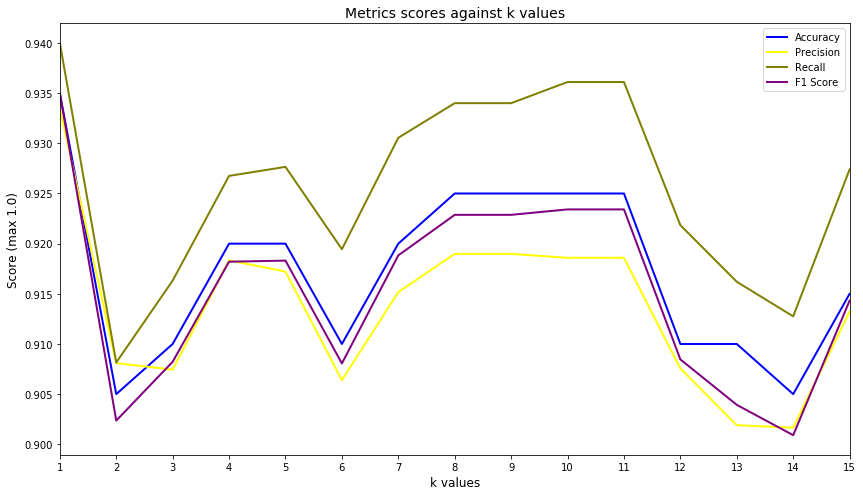

In [162]:
# Plotting metrics scores against k values
fig, axes = plt.subplots(1,1, figsize=(12,7))
axes.plot(k_values, accuracy, color='blue', linewidth=2, label='Accuracy')
axes.plot(k_values, precision, color='yellow', linewidth=2, label='Precision')
axes.plot(k_values, recall, color='olive', linewidth=2, label='Recall')
axes.plot(k_values, f1_score, color='purple', linewidth=2, label='F1 Score')

axes.set_title("Metrics scores against k values", size=14)
axes.set_xlabel("k values", size=12)
axes.set_xticks([i for i in range(1,16)])
axes.set_ylabel("Score (max 1.0)", size=12)
axes.legend()

fig.tight_layout()
plt.margins(x=0)
plt.show()

According to the graph, we can see the similarity among the trends of the scores. All four peaked right from the beginning of the iteration at k equals to 1. When we increased k to 2, all experienced a significant drop. During the rest of the test, big fluctuations can be recognized. The accuracy score peaked at k equals to 1 at 93.5%. Even though with larger values of k the performance were not as good, but the the score only fluctuated from 90 to 92%, which indicates that the model has a relatively high accuracy in the k-value range of 1 to 15.

However, in order to further investigate the correlations between k and the performance of the model, another test was conducted along with another similar visulization. In this test, the model was called again but with the training set as the testing set.

In [164]:
# Same code but passing train_4k to knn_mnist() as the testing set
accuracy_train = []
precision_train  = []
recall_train  = []
f1_score_train  = []

for i in range(1,16):
    acc_k = knn_mnist(i, train_4k, train_4k)[0]
    accuracy_train.append(acc_k)
    
    prec_k = []
    rec_k = []
    f1_k = []
    for j in range(0,10): # MNIST dataset contains handwritten digits
        prec_digit = knn_mnist(i, train_4k, test_2h,j)[1]
        rec_digit = knn_mnist(i, train_4k, test_2h,j)[2]
        f1_digit = knn_mnist(i, train_4k, test_2h,j)[3]
        
        prec_k.append(prec_digit)
        rec_k.append(rec_digit)
        f1_k.append(f1_digit)
    
    precision_train.append(sum(prec_k)/len(prec_k))
    recall_train.append(sum(rec_k)/len(rec_k))
    f1_score_train.append(sum(f1_k)/len(f1_k))

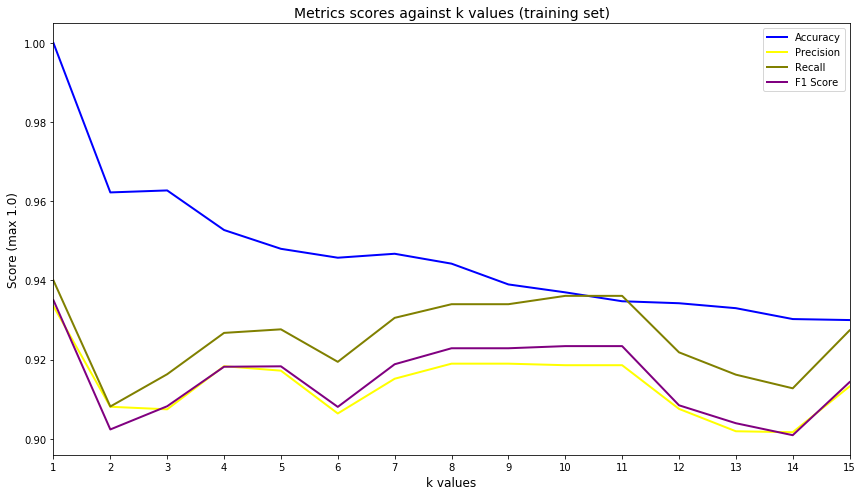

In [166]:
# Plotting the scores again
fig, axes = plt.subplots(1,1, figsize=(12,7))
axes.plot(k_values, accuracy_train, color='blue', linewidth=2, label='Accuracy')
axes.plot(k_values, precision_train, color='yellow', linewidth=2, label='Precision')
axes.plot(k_values, recall_train, color='olive', linewidth=2, label='Recall')
axes.plot(k_values, f1_score_train, color='purple', linewidth=2, label='F1 Score')

axes.set_title("Metrics scores against k values (training set)", size=14)
axes.set_xlabel("k values", size=12)
axes.set_xticks([i for i in range(1,16)])
axes.set_ylabel("Score (max 1.0)", size=12)
axes.legend()

fig.tight_layout()
plt.margins(x=0)
plt.show()

Overall, the scores were all higher compared to those from using test_2h as the testing set. This was understandable since there was always a little bias because the model was trained to optimize the performance on the training set. However, there were differences this time among the trends of the scores. Accuracy took a different pattern as it gradually decreased as k got larger. Fluctuations were still recognizable in the movement of the other three even though the range was lower. 

Normally, as k increases, there will be a bias-variance tradeoff. When k = 1, bias will be 0 and the accuracy will be 100% just like what we see in the graph. However, theoretically, the variance will be high (meaning the model only performs well on the training data, or it's called overfitting) when testing the model on never-seen-before data which will lower the accuracy. As we increase k, bias will increase but at the same time variance will decrease, and there will be a point where the accuracy for the testing set will be as optimized as possible. 

However, as we can see in the first graph, a bigger value of k doesn't necessarily mean higher accuracy, at least in the k-value range of 1 to 15. The only evidence that we can see that follows the bias-variance tradeoff theory is the decrease in accuracy on the training data. As k increased, bias increased, and accuracy on training data did decrease. 

To improve the accuracy, one can try to test on a wider range of k. However, the more "neighbors" the model has to process, the more complex and expensive the computation will be. Increasing the size of the training data is also a promising direction. MNIST has 60,000 records in its training set and another 10,000 in its testing set. Another way is to use a different classification model such as SVM or neural networks. 